In [294]:
import warnings
import datetime

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [215]:
def softmax(X, weight, Bias):
    '''
    softmax function  
    takes :
    X = training data
    W =  weight matrix
    b = bias vector (intercept) 
    return :
      softmax for every z unit e^{k_ij}/Sum(e^{k_i1}+e^{k_i2}+e^{k_i3})
    '''
    #dot product between X_data matrix  and tranposed Weight_ matrix added to Bias  gives matrix each z_ij
    #Z = X.dot(W.T)+B 
    
    #return matrix cosist of exponentials Z input net
    exp_z = np.exp(X.dot(weight.T)+Bias)
    
    #array contains sum  of every row  (e^z_{ik})
    sums=np.sum(exp_z, axis=1) 
    
    #return softmax(Z)_{ij}
    return (exp_z.T/sums).T 

def perform_gradient(X,y,max_iter=300,learning_rate=0.1,innitial_value =1, debug_W=None):
    
    print('fuck',max_iter)  
    #debug values of wieght matrix
    debug_mode = False
    if debug_W is not None: debug_mode=True 
    
    bias = np.full((y.shape[1],),innitial_value)
    W = np.full((y.shape[1], X.shape[1]), innitial_value)
    if debug_mode:  debug = W[(debug_W)]
    m = X.shape[0] 
    gamma = (1/m)*learning_rate
    
    for i in range(max_iter):
        B = softmax(X,W,bias)-y
        W = W - gamma*(B.T).dot(X)
        bias = bias - gamma*np.sum(B, axis=0)
        if debug_mode: debug = np.append(debug, W[debug_W])
    
    if debug_mode: 
            return W,bias,debug
    print('fuck',max_iter)    
    return W,bias


def accuracy(Y_target, Y_predicted):
    C =  np.argmax(Y_target,axis=1)==np.argmax(Y_predicted,axis=1)
    D = np.where(C==True)
    return len(D[0])/len(C)

In [216]:

iris = load_iris()
X = iris.data
Y_iris = iris.target
print(X.shape)
print(Y_iris.shape)
Y = np.array(pd.get_dummies(Y_iris))
             
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

(150, 4)
(150,)


In [235]:
W,b,k = perform_gradient(X_train,y_train,max_iter=999,learning_rate=10,debug_W=(0,1))
y_predict = np.around(softmax(X_test,W,b),2)
accuracy(y_test, y_predict)

fuck 999


1.0

In [347]:
W,b,k = perform_gradient(X_train,y_train,max_iter=100,learning_rate=0.02,debug_W=(0,1))
y_predict = np.around(softmax(X_test,W,b),2)
accuracy(y_test, y_predict)
print(W)
print(b)

fuck 100
[[1.13912853 1.36806065 0.44595227 0.74652812]
 [1.018221   0.85803142 1.15116108 1.00726296]
 [0.84265048 0.77390793 1.40288666 1.24620892]]
[1.07521097 1.00883369 0.91595534]


In [236]:
W,b,k = perform_gradient(X_train,y_train,max_iter=1999,learning_rate=10,debug_W=(0,1))
y_predict = np.around(softmax(X_test,W,b),2)
accuracy(y_test, y_predict)

fuck 1999


0.96

In [325]:
i = 0
for learning_rate in (100,50,10,5,1,0.1):
    print(i)
    print(learning_rate)
    i =i+1
i=0    
for learning_rate in range(5):
    print(i)
    print(learning_rate)
    i =i+1    

0
100
1
50
2
10
3
5
4
1
5
0.1
0
0
1
1
2
2
3
3
4
4


fuck 100
fuck 1000
fuck 10000


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


fuck 100
fuck 1000
fuck 10000
fuck 100
fuck 1000
fuck 10000
fuck 100
fuck 1000
fuck 10000
fuck 100
fuck 1000
fuck 10000
fuck 100
fuck 1000
fuck 10000


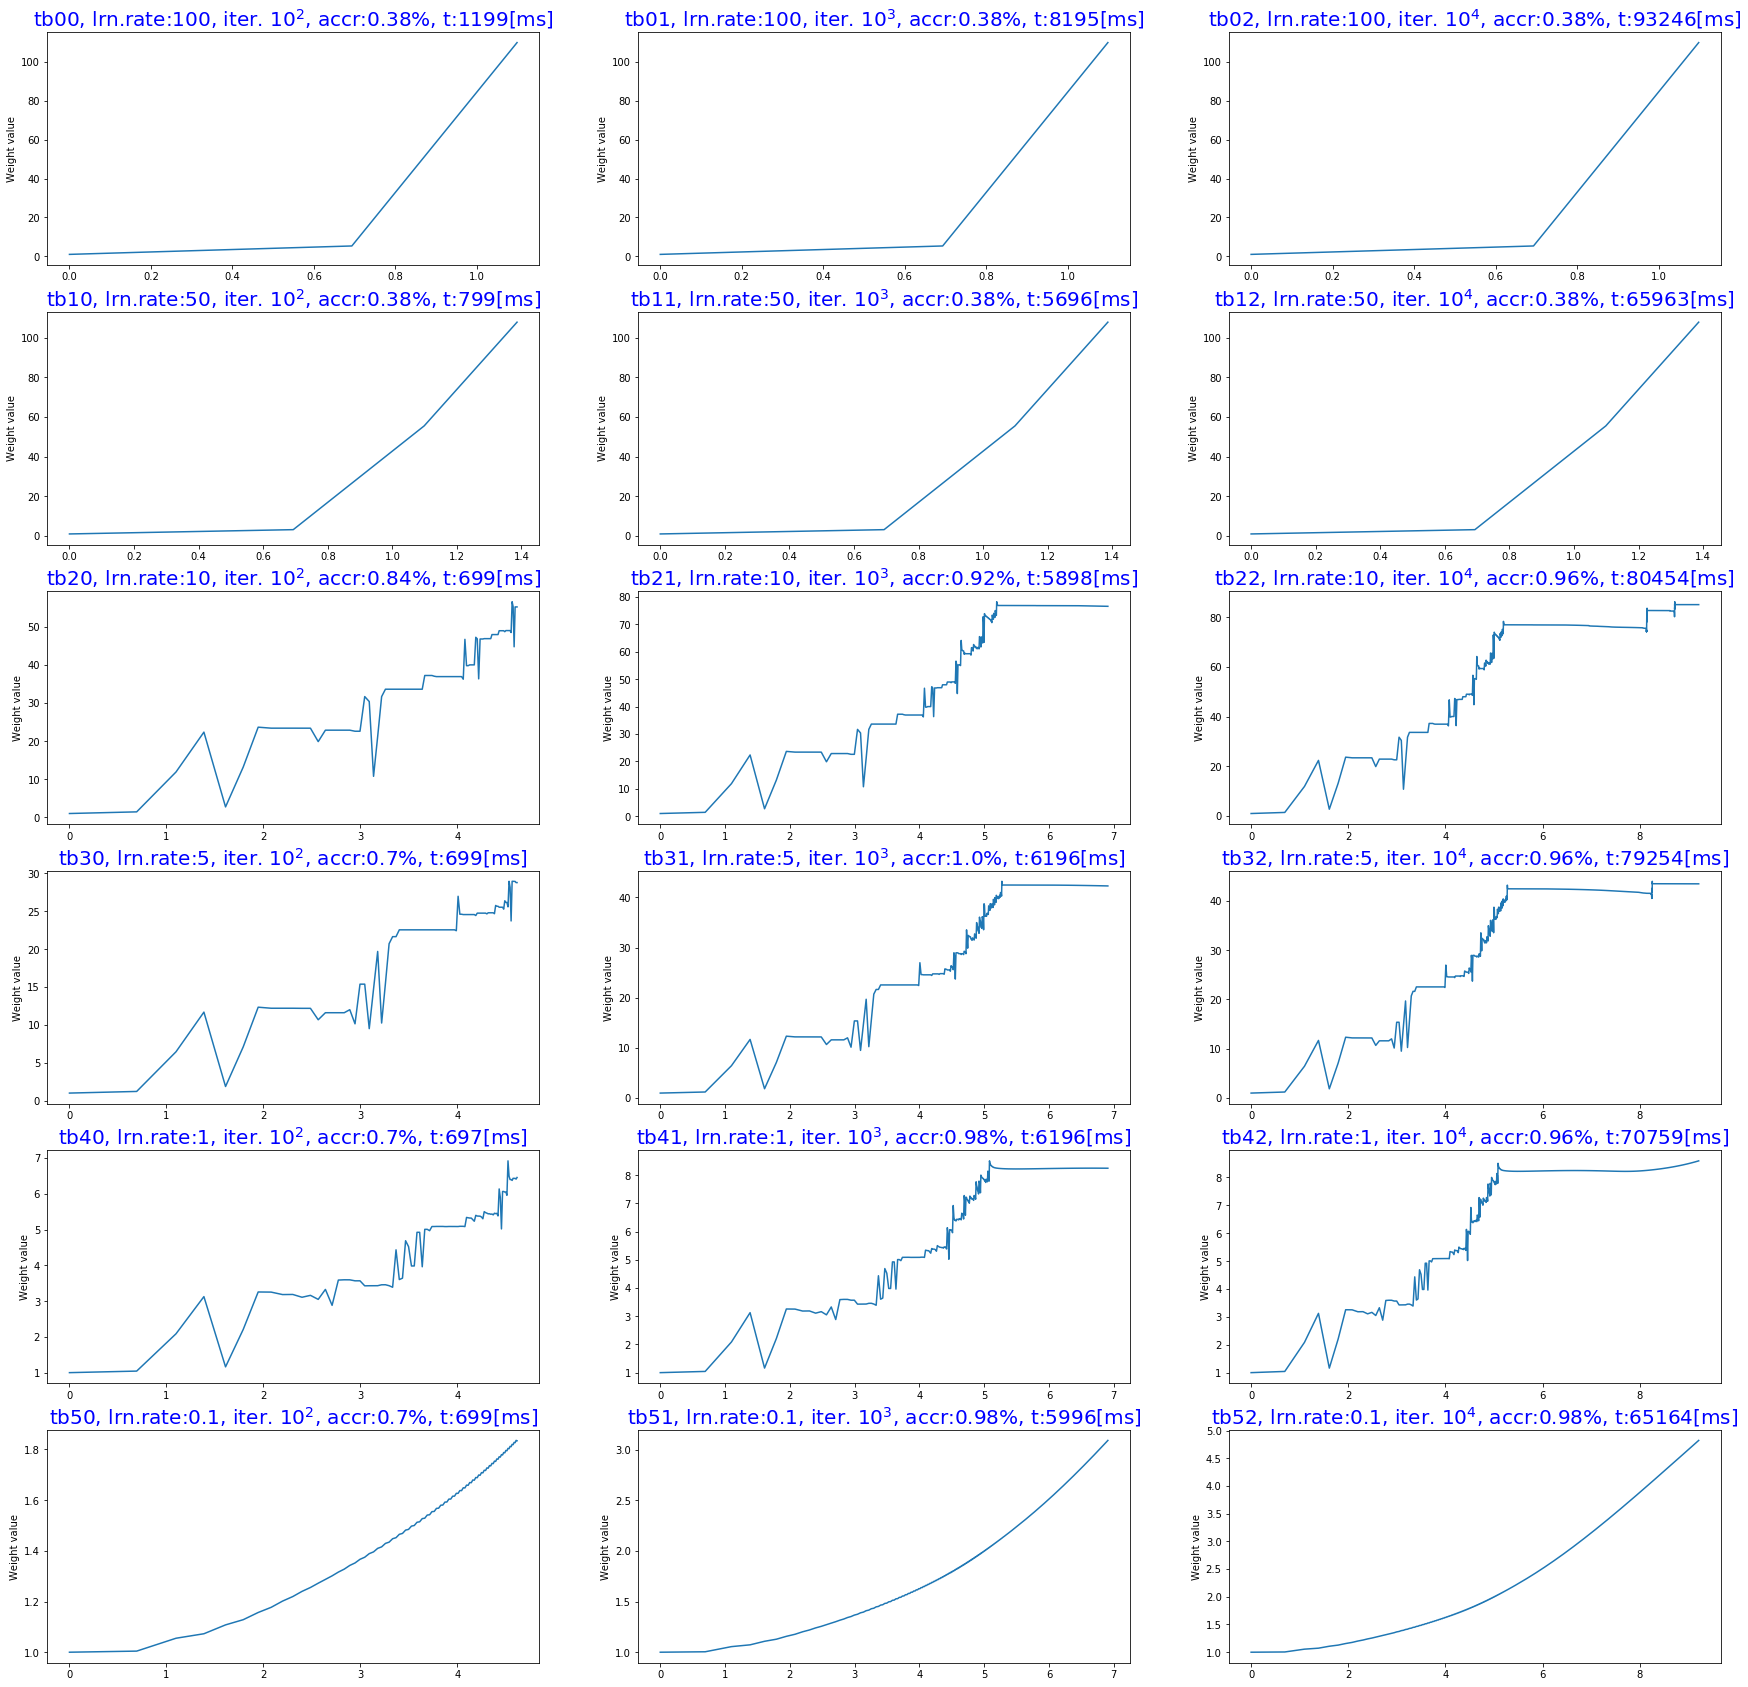

In [340]:
fig, axs = plt.subplots(6, 3,figsize=(30,30))     
i = -1
for learning_rate in (100,50,10,5,1,0.1):
    i+=1
    for j in range(3):
        r = j+2
        max_iter = 10**(r)  
        start = datetime.datetime.now()
        W,b,k = perform_gradient(X_train,y_train,max_iter=max_iter,learning_rate=learning_rate,debug_W=(0,1))
        y_predict = np.around(softmax(X_test,W,b),2)
        a = accuracy(y_test, y_predict)
        stop =  datetime.datetime.now()
        time = int((stop-start).total_seconds() * 100000)
        axs[i, j].set_title('tb{}{}, lrn.rate:{}, iter. $10^{} $, accr:{}%, t:{}[ms]'.format(i,j,np.round(learning_rate,2),r,a,time),size=20,color='blue')
        x = np.linspace(1,len(k),len(k))
        axs[i, j].plot(np.log(x),k)
      
for ax in axs.flat:
    ax.set( ylabel='Weight value')